In [2]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

##Demo演示LogisticRegression分类


#模型训练

In [3]:
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])

In [4]:
x_fearures##建立二维数组，一维数组

array([[-1, -2],
       [-2, -1],
       [-3, -2],
       [ 1,  3],
       [ 2,  1],
       [ 3,  2]])

In [5]:
y_label = np.array([0, 0, 0, 1, 1, 1])
y_label

array([0, 0, 0, 1, 1, 1])

In [6]:
## 调用逻辑回归模型
lr_clf = LogisticRegression()

In [7]:
## 用逻辑回归模型拟合构造的数据集           调用fit(x,y)的方法来训练模型，其中x为数据的属性，y为所属类型。
lr_clf = lr_clf.fit(x_fearures, y_label)          #其拟合方程为 y=w0+w1*x1+w2*x2

In [8]:
## 查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_, lr_clf.intercept_)


##coef_为w1到w4

##intercept_为w0

the weight of Logistic Regression: [[0.73455784 0.69539712]] [-0.13139986]


In [9]:
plt.figure()        #通过new_figure_manager（新图形管理器）返回一个figure图形实例。定制的figure类将与pylab接口进行关联，同时将相关参数传递给figure的初始化函数。 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

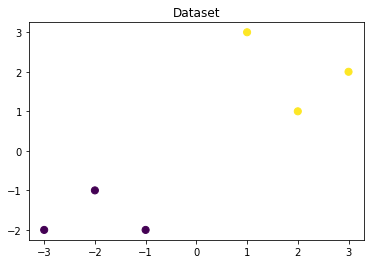

In [10]:
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')  
#绘制散点图 x: xy:_fearures[:,0]左边，y: xy:_fearures[:,1]右边，
#c → 散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )
#s → 散点的面积
#cmap → 指的是matplotlib.colors.Colormap，相当于多个调色盘的合集，这里从cmap中选取了一个叫做'viridis'的调色盘，其作用是，将参数c中获取到的数值，映射到“色盘”中已经对应好的颜色上
plt.title('Dataset')     #标题
plt.show()               #展示

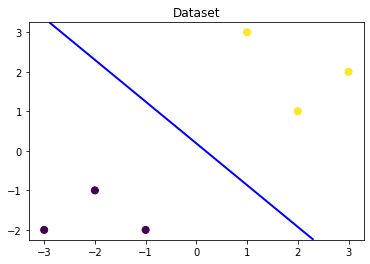

In [11]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 200, 100
#点的个数
x_min, x_max = plt.xlim() 
#xmin：x轴上的最小值
#xmax：x轴上的最大值
y_min, y_max = plt.ylim()


x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
#np.linspace(x_min, x_max, nx)  在指定的间隔内返回均匀间隔的数字。 返回num均匀分布的样本，在[start, stop]。
#np.meshgrid生成网格点坐标矩阵：坐标矩阵——横坐标矩阵X XX中的每个元素，与纵坐标矩阵Y YY中对应位置元素，共同构成一个点的完整坐标。
#x_grid, y_grid 存储坐标矩阵

z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
#ravel()方法将数组维度拉成一维数组
#np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。把[x,y]按顺序拉成一个一维数组       np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
#lr_clf.predict_proba的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1，有多少个分类结果，每行就有多少个概率，以至于它对每个结果都有一个可能，如0、1就有两个概率
#这个就是对每个坐标进行预测，结果存在数组中，每个元素由两种组成，因为有0和1两个可能。

z_proba = z_proba[:, 1].reshape(x_grid.shape)
#shape的输入参数可以是一个整数（表示维度），也可以是一个矩阵。读取矩阵的长度，比如shape[0]就是读取矩阵第一维度的长度。这里返回的是1，N
##从索引0开始，到索引1，不包括索引1

#reshape(a, b); 依次生成n个自然数，并且以a行b列的数组形式显示:

plt.contour(x_grid, y_grid, z_proba,[0.5], linewidths=2, colors='blue')
#绘制轮廓线，类于等高线 [0.5],概率是0.5的线的位置
#X，Y ：值Z的坐标。
#如果int Ñ，使用Ñ数据间隔; 即绘制n + 1个等高线。水平高度自动选择。
#如果是数组，则在指定的级别绘制轮廓线。值必须按递增顺序排列。
#[0.5],只画0.5的线
#其训练得到的逻辑回归模型的概率为0.5的判别面为上图中蓝色的线

plt.show()

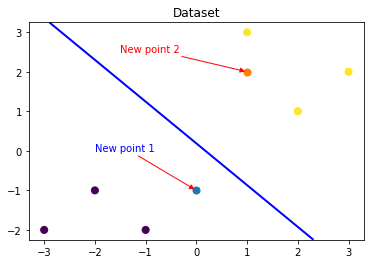

In [12]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(text='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))
#函数用于标注文字。s 为注释文本内容,s 为注释文本内容,xytext 为注释文字的坐标位置,arrowprops #箭头参数,参数类型为字典dict

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(text='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

模型预测

In [13]:
## 在训练集和测试集上分别利用训练好的模型进行预测
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)
#predict返回的是一个预测的值
#lr_clf模型


print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]


In [15]:
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)
#两个可能的概率


print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]


可以发现训练好的回归模型将X_new1预测为了类别0（判别面左下侧），X_new2预测为了类别1（判别面右上侧）。其训练得到的逻辑回归模型的概率为0.5的判别面为上图中蓝色的线。